In [154]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision import transforms

In [155]:
custom_image_path = "./cat-and-dog/test_set/test_set/cats/cat.4040.jpg"

In [156]:
import torchvision

custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Đưa pixel về khoảng [0,1]
custom_image = custom_image / 255.0

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.1255, 0.1176, 0.1059,  ..., 0.2667, 0.1647, 0.1529],
         [0.0784, 0.0706, 0.0588,  ..., 0.2863, 0.1529, 0.0902],
         [0.0745, 0.0706, 0.0627,  ..., 0.3569, 0.2078, 0.1294],
         ...,
         [0.2471, 0.2471, 0.2510,  ..., 0.4157, 0.4196, 0.4235],
         [0.2235, 0.2157, 0.2078,  ..., 0.4824, 0.4902, 0.4941],
         [0.2353, 0.2353, 0.2353,  ..., 0.6706, 0.6275, 0.5922]],

        [[0.1373, 0.1294, 0.1176,  ..., 0.2588, 0.1569, 0.1412],
         [0.0902, 0.0824, 0.0706,  ..., 0.2863, 0.1451, 0.0824],
         [0.0863, 0.0824, 0.0745,  ..., 0.3686, 0.2078, 0.1216],
         ...,
         [0.2235, 0.2235, 0.2275,  ..., 0.3804, 0.3843, 0.3882],
         [0.2000, 0.1922, 0.1843,  ..., 0.4471, 0.4588, 0.4588],
         [0.2118, 0.2118, 0.2118,  ..., 0.6275, 0.5843, 0.5490]],

        [[0.1569, 0.1490, 0.1373,  ..., 0.3020, 0.2000, 0.1843],
         [0.1098, 0.1020, 0.0902,  ..., 0.3255, 0.1882, 0.1255],
         [0.1059, 0.1020, 0.0941,  ..

In [157]:
IMAGE_SIZE = (224,224)

custom_image_transform = transforms.Compose(
    [
        transforms.Resize(IMAGE_SIZE),
    ]
)

custom_image_transformed = custom_image_transform(custom_image)

print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 217, 299])
New shape: torch.Size([3, 224, 224])


In [158]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=64),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv_layer_2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=512),
            nn.MaxPool2d(2),
        )
        self.conv_layer_3 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=512),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(), nn.Linear(in_features=512 * 3 * 3, out_features=2)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.classifier(x)
        return x


# Instantiate an object.
model = CNN()

In [159]:
device = torch.device("cpu")

In [160]:
model.load_state_dict(torch.load("cat-dog-model.pth", map_location=device))
model.to(device)

CNN(
  (conv_layer_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(64, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_3): Sequential(
    (0): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features

In [161]:
model.eval()
with torch.no_grad():
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(
        f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}"
    )

    custom_image_pred = model(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 224, 224])
Unsqueezed custom image shape: torch.Size([1, 3, 224, 224])


In [165]:
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Dự đoán: {custom_image_pred_label}")

Dự đoán: tensor([0])


In [166]:
class_names = ["cats", "dogs"]
custom_image_pred_class = class_names[
    custom_image_pred_label
]  # put pred label to CPU, otherwise will error
custom_image_pred_class

'cats'

(-0.5, 298.5, 216.5, -0.5)

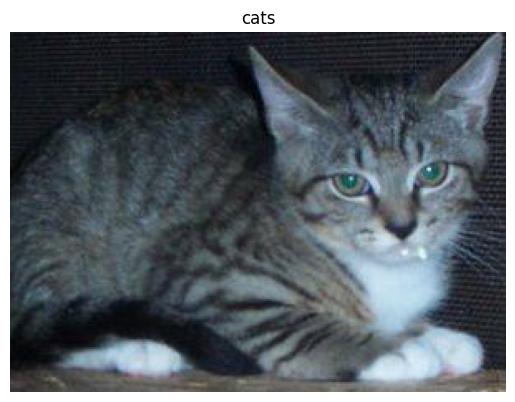

In [167]:
plt.imshow(
    custom_image.permute(1, 2, 0)
)  # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(custom_image_pred_class)
plt.axis(False)